# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [1]:
api.openweathermap.org/data/2.5/weather?units=Imperial&q=london&appid=e713fa3b0b7a7ca17daf3264526d51a9

api.openweathermap.org/data/2.5/weather?appid=e713fa3b0b7a7ca17daf3264526d51a9units=Imperial&q=london

api.openweathermap.org/data/2.5/weather?&units=imperial&q=londonappid=e713fa3b0b7a7ca17daf3264526d51a9

SyntaxError: invalid syntax (<ipython-input-1-aea58bcc08ed>, line 1)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
#defining base url nad building query

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
print(query_url+'denver')

http://api.openweathermap.org/data/2.5/weather?appid=e713fa3b0b7a7ca17daf3264526d51a9&units=imperial&q=denver


In [4]:
# set up lists to hold reponse info
dic = []
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and perform a request for data on each
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    #for visuals groupby sets of 50, add a condition to groupby cities to sets of 50
    if i%50==0 and i >=50:
        #set_count = set_count + 1
        set_count += 1
        record_count = 0
        
    city_url = query_url + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        response = requests.get(city_url).json()
        a = {
            "city": city,
            "country": response['sys']['country'],
            "date": response['dt'],
            "lon": response['coord']['lon'],
            "lat": response['coord']['lat'],
            "temp": response['main']['temp_max'],
            "humd": response['main']['humidity'],
            "cloud": response['clouds']['all'],
            "wind": response['wind']['speed'],
        }
        dic.append(a)
    except:
        print("City not found. Skipping...")
        pass





Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | lalibela
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | alice town
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | ypsonas
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | chara
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | malinyi
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | velyka pysarivka
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 34 of Set 4 | saskylakh
Processing Record 35 of Set 4 | jiaojiang
Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | sabha
Processing Record 38 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | talara
Processing Record 40 of Set 4 | moerai
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | mathathane
Processing Record 43 of Set 4 | sieradz
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | fomboni
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | svetlaya
Processing Record 48 of Set 4 | raga
Processing Record 49 of Set 4 | thomasville
Processing Record 0 of Set 5 | erdenet
Processing Record 1 of Set 5 | bay roberts
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | hambantota
Processing Record 4 of Set 5 | kyzyl-suu
Processing Record 5 of Set 5 | ust-kuyga
Pr

Processing Record 25 of Set 8 | husavik
Processing Record 26 of Set 8 | morros
Processing Record 27 of Set 8 | carutapera
Processing Record 28 of Set 8 | walvis bay
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | orlik
Processing Record 31 of Set 8 | qorveh
Processing Record 32 of Set 8 | kabinda
Processing Record 33 of Set 8 | idritsa
Processing Record 34 of Set 8 | ishigaki
Processing Record 35 of Set 8 | manzhouli
Processing Record 36 of Set 8 | tocopilla
Processing Record 37 of Set 8 | knysna
Processing Record 38 of Set 8 | arkhipo-osipovka
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | rorvik
Processing Record 42 of Set 8 | ulaangom
Processing Record 43 of Set 8 | salo
Processing Record 44 of Set 8 | sao filipe
Processing Record 45 of Set 8 | kautokeino
Processing Record 46 of Set 8 | subaytilah
City not found. Skipping...
Processing Record 47 of Set 8 | mulanje
Processing Record 48 of Set 8 | sa

Processing Record 16 of Set 12 | jiazi
Processing Record 17 of Set 12 | sendafa
Processing Record 18 of Set 12 | chunoyar
Processing Record 19 of Set 12 | rungata
City not found. Skipping...
Processing Record 20 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 21 of Set 12 | tselinnoye
Processing Record 22 of Set 12 | douglas
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | puerto leguizamo
Processing Record 25 of Set 12 | yingcheng
Processing Record 26 of Set 12 | ahwa
Processing Record 27 of Set 12 | colquechaca
Processing Record 28 of Set 12 | cape coast
Processing Record 29 of Set 12 | roebourne
Processing Record 30 of Set 12 | deputatskiy
Processing Record 31 of Set 12 | sorvag
City not found. Skipping...
Processing Record 32 of Set 12 | khao yoi
Processing Record 33 of Set 12 | lukovetskiy
Processing Record 34 of Set 12 | saint-augustin
Processing Record 35 of Set 12 | nhulunbuy
Processing Record 36 of Set 12 | sorland
P

In [5]:
dic

[{'city': 'longyearbyen',
  'country': 'SJ',
  'date': 1586974659,
  'lon': 15.64,
  'lat': 78.22,
  'temp': 35.6,
  'humd': 74,
  'cloud': 75,
  'wind': 21.92},
 {'city': 'ribeira grande',
  'country': 'PT',
  'date': 1586974753,
  'lon': -28.7,
  'lat': 38.52,
  'temp': 56.71,
  'humd': 64,
  'cloud': 51,
  'wind': 22.59},
 {'city': 'lalibela',
  'country': 'ET',
  'date': 1586974753,
  'lon': 39.03,
  'lat': 12.03,
  'temp': 61.09,
  'humd': 40,
  'cloud': 69,
  'wind': 8.84},
 {'city': 'saint-philippe',
  'country': 'RE',
  'date': 1586974753,
  'lon': 55.77,
  'lat': -21.36,
  'temp': 77,
  'humd': 69,
  'cloud': 6,
  'wind': 21.92},
 {'city': 'alice town',
  'country': 'BS',
  'date': 1586974753,
  'lon': -79.3,
  'lat': 25.72,
  'temp': 80.98,
  'humd': 79,
  'cloud': 29,
  'wind': 16.96},
 {'city': 'ypsonas',
  'country': 'CY',
  'date': 1586974754,
  'lon': 32.96,
  'lat': 34.69,
  'temp': 64.4,
  'humd': 63,
  'cloud': 85,
  'wind': 2.24},
 {'city': 'lompoc',
  'country': 'US

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame(dic)
city_data.to_csv(output_data_file, index_label='city_id')
city_data.count()

city       577
country    577
date       577
lon        577
lat        577
temp       577
humd       577
cloud      577
wind       577
dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [34]:
# city_data['date'] = pd.datetime.strptime(city_data['date'], '%Y%m%d')
city_data.head()


,city,country,date,lon,lat,temp,humd,cloud,wind
0,carnarvon,AU,1586805063,113.63,-24.87,75.20,94,2,14.99
1,dingle,PH,1586805069,122.67,11.00,78.08,84,7,5.77
2,mahebourg,MU,1586805070,57.70,-20.41,78.80,74,75,11.41
3,cape town,ZA,1586805025,18.42,-33.93,60.01,87,23,5.82
4,saskylakh,RU,1586805338,114.08,71.92,13.42,94,97,8.19


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
#use this when creating the title which just calls todays date
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

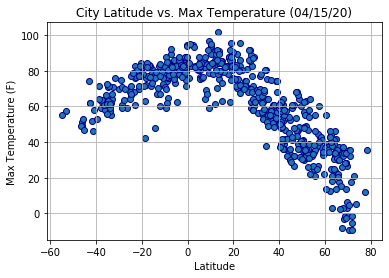

In [12]:
plt.scatter(city_data["lat"],city_data["temp"],edgecolor='darkblue')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("images/latitude_maxtemp.png")
plt.show()

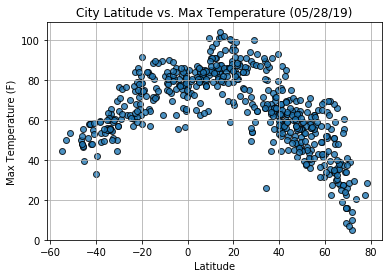

#### Latitude vs. Humidity Plot

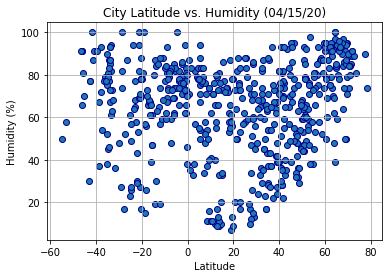

In [16]:
plt.scatter(city_data["lat"],city_data["humd"],edgecolor='darkblue')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("images/latitude_humidity.png")
plt.show()

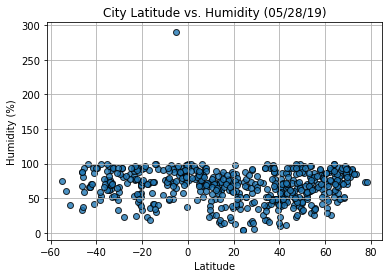

#### Latitude vs. Cloudiness Plot

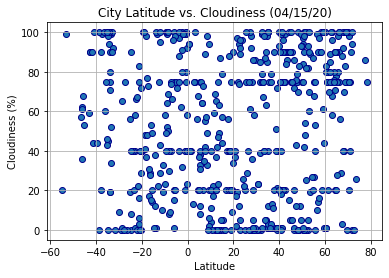

In [17]:
plt.scatter(city_data["lat"],city_data["cloud"],edgecolor='darkblue')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("images/latitude_cloudiness.png")
plt.show()

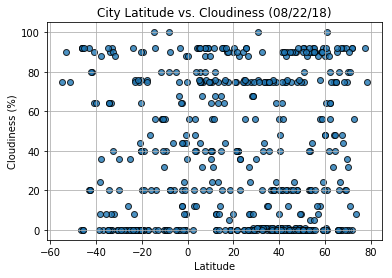

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(city_data["lat"],city_data["wind"],edgecolor='darkblue')
plt.title("City Latitude vs. Max Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("images/latitude_cloudiness.png")
plt.show()

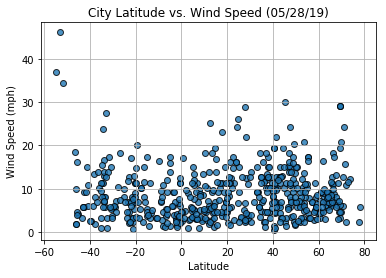

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
#defining function using def inside the () are all the values that we are going to change based on our plots
def linregressplot(x_values,y_values,title,coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,color="red")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = city_data.loc[(city_data['lat'] >= 0)]
southern_df = city_data.loc[(city_data['lat'] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7856547945850497


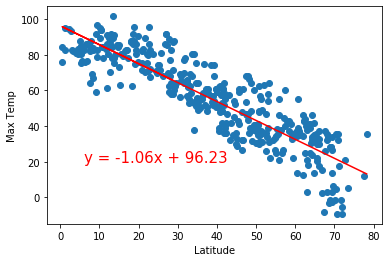

In [22]:
x_values = northern_df['lat']
y_values = northern_df['temp']

linregressplot(x_values,y_values,"Max Temp",(6,20))

The r-squared is: -0.8151657406810827


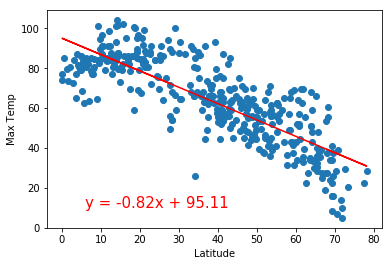

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5468766137820258


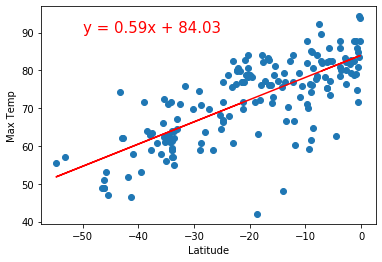

In [24]:
x_values = southern_df['lat']
y_values = southern_df['temp']

linregressplot(x_values,y_values,"Max Temp",(-50,90))

The r-squared is: 0.760263355051646


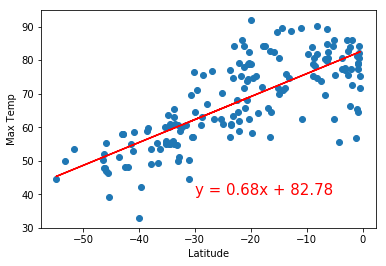

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1442469590744172


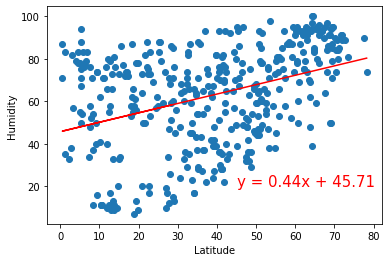

In [28]:
x_values = northern_df['lat']
y_values = northern_df['humd']

linregressplot(x_values,y_values,"Humidity",(45,20))

The r-squared is: 0.10358336015746494


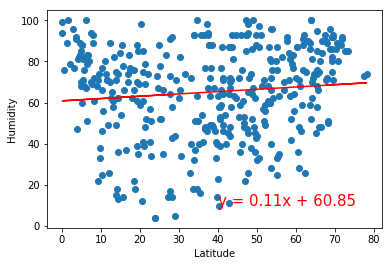

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0005167473345413157


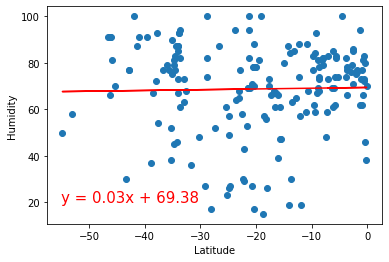

In [33]:
x_values = southern_df['lat']
y_values = southern_df['humd']

linregressplot(x_values,y_values,"Humidity",(-55,20))

The r-squared is: 0.14689473425583055


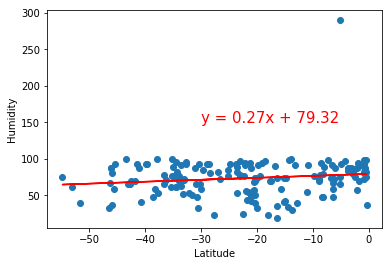

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.07609968729721084


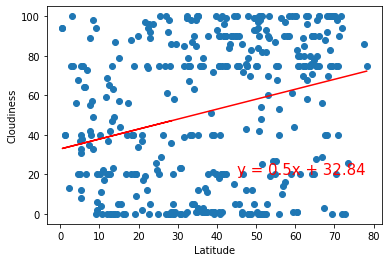

In [34]:
x_values = northern_df['lat']
y_values = northern_df['cloud']

linregressplot(x_values,y_values,"Cloudiness",(45,20))

The r-squared is: -0.08733547918934018


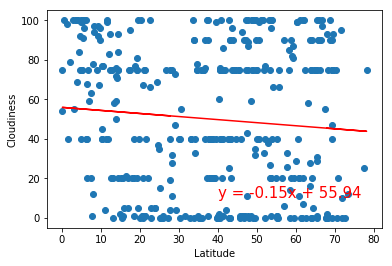

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.00039491777865741833


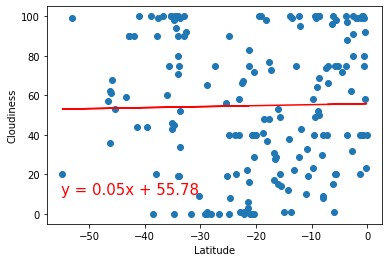

In [37]:
x_values = southern_df['lat']
y_values = southern_df['cloud']

linregressplot(x_values,y_values,"Cloudiness",(-55,10))

The r-squared is: 0.21881426893991618


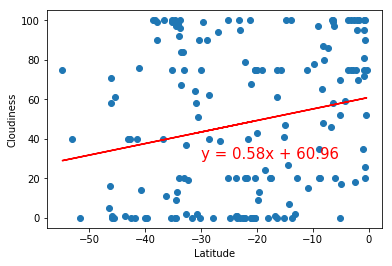

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.008464054423971093


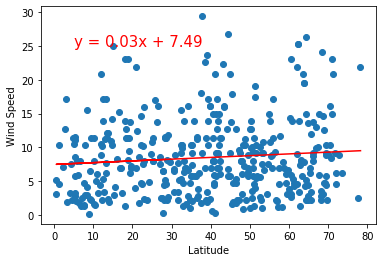

In [39]:
x_values = northern_df['lat']
y_values = northern_df['wind']

linregressplot(x_values,y_values,"Wind Speed",(5,25))

The r-squared is: 0.1071382774388479


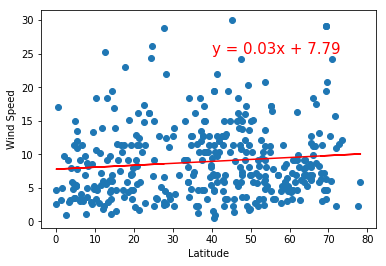

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.04506292615778501


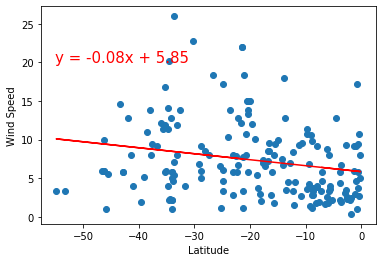

In [42]:
x_values = southern_df['lat']
y_values = southern_df['wind']

linregressplot(x_values,y_values,"Wind Speed",(-55,20))

The r-squared is: -0.322483077139538


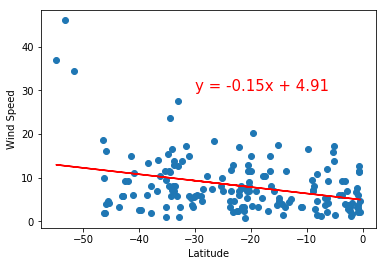